In [64]:
import pandas as pd
import numpy as np
from orbit.models.ets import ETSMAP, ETSFull
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.plot import plot_predicted_components
from orbit.utils.dataset import load_iclaims

In [65]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [66]:
raw_df = load_iclaims()
raw_df.dtypes

week              datetime64[ns]
claims                     int64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
dtype: object

In [71]:
df=raw_df.copy()
df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']] =\
df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']].apply(np.log)

In [72]:
test_size=52
train_df=df[:-test_size]
test_df=df[-test_size:]

In [96]:
ets = ETSFull(
    response_col='claims',
    date_col='week',
    seasonality=52,
    regressor_col=['trend.unemploy', 'trend.filling', 'trend.job'],
    seed=2020,
)

In [97]:
ets.fit(train_df)

In [100]:
predicted_df = ets.predict(df=df, decompose=True)

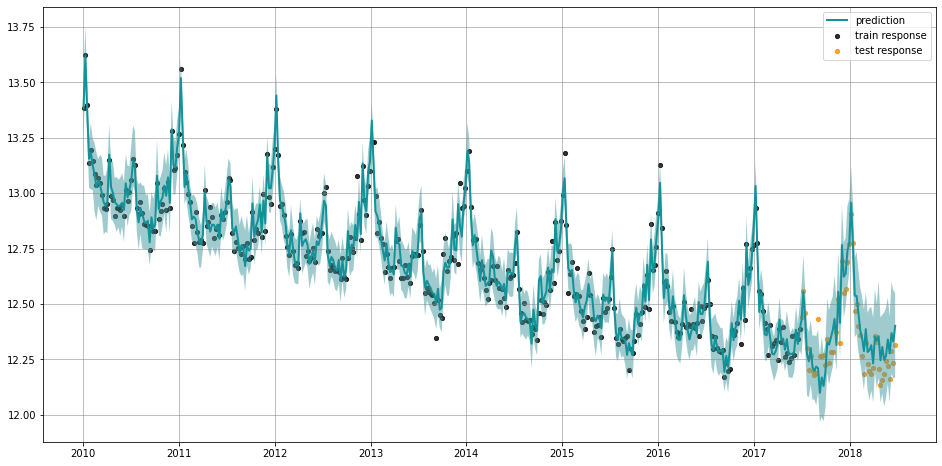

In [101]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col='week', actual_col='claims',  
                    test_actual_df=test_df)

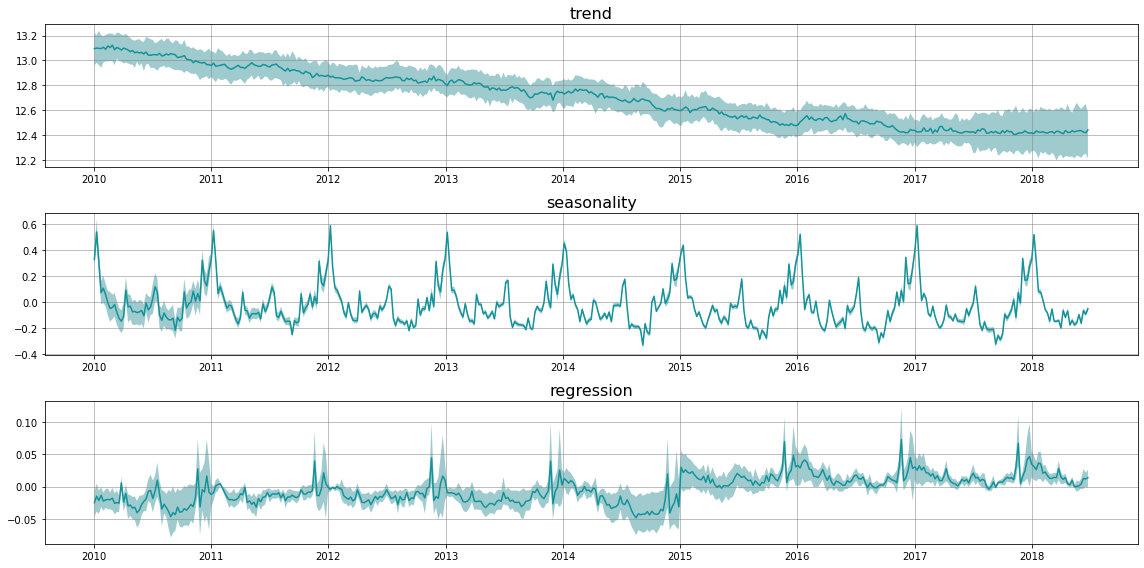

In [102]:
plot_predicted_components(predicted_df=predicted_df, date_col='week')

In [103]:
ets.get_regression_coefs('mean')

,regressor,regressor_sign,coefficient
0,trend.unemploy,Regular,0.055443
1,trend.filling,Regular,0.100967
2,trend.job,Regular,-0.025582
